In [37]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_friedman1
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [2]:
tags= pd.read_csv('./kddcup.names',sep=':')
tags.reset_index(inplace=True)
tags= pd.Series.tolist(tags['index'])
tags.append('class')
skiprows=[485798-1,]
df = pd.read_csv('./kddcup.data_10_percent.txt',names=tags,header=None,index_col=False,skiprows=skiprows)

In [3]:
def remove(v):
    return v.strip('.')
 
df['class'] = df['class'].apply(remove)

In [4]:
df.drop(df[df['class']=='0.00'].index,inplace=True)

In [5]:
attack_tags = ["attack","class"]
attack= pd.read_csv('./training_attack_types',sep=' ',names=attack_tags,index_col='attack')

classtype = {'normal':0, 'probe':1, 'dos':2, 'u2r':3, 'r2l':4}
attack['class'] = attack['class'].replace(classtype)

a=attack.to_dict()['class']
a['normal']= 0

In [6]:
df['class']= df['class'].map(a)
display(df)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,0


In [7]:
df=df.drop_duplicates()
df = shuffle(df)

In [8]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols

['service', 'flag', 'protocol_type']

In [9]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [10]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

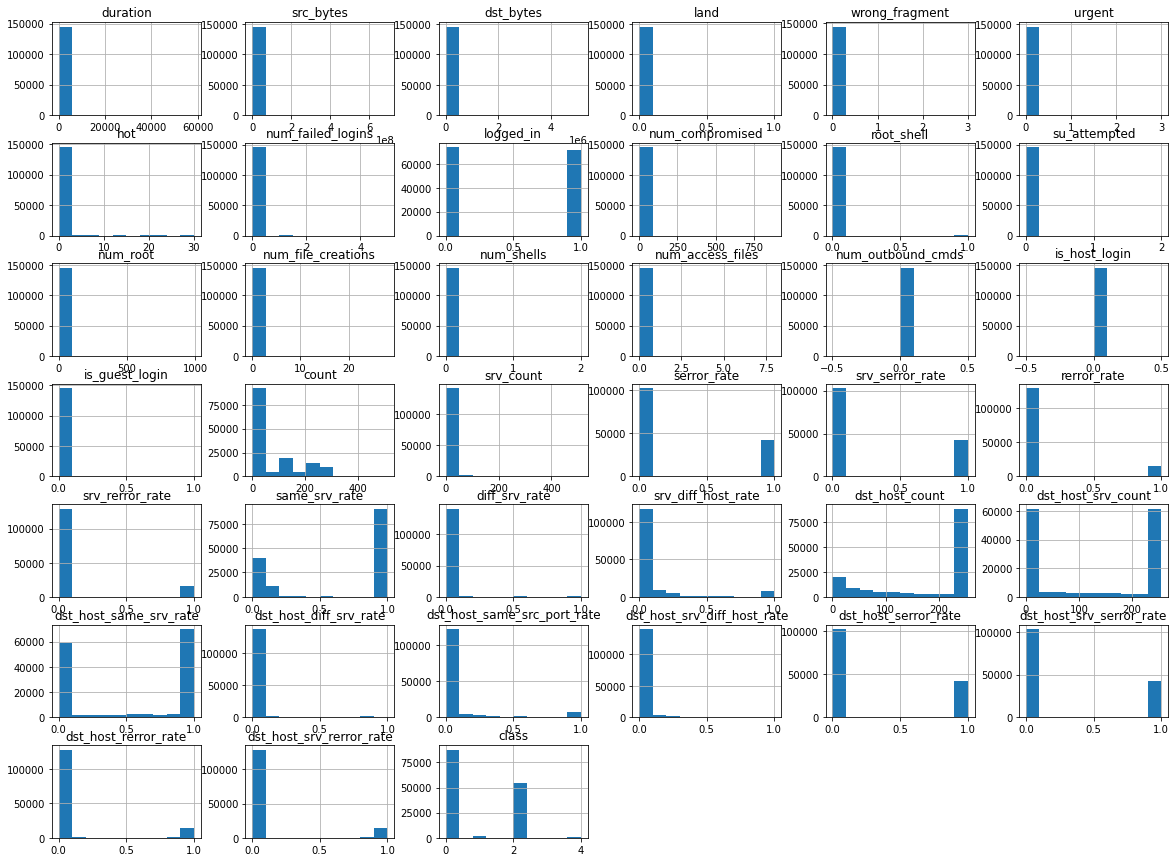

In [11]:
df[df.columns].hist(figsize=(20,15))
print()


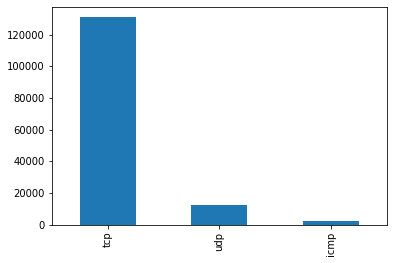

In [12]:
bar_graph('protocol_type')

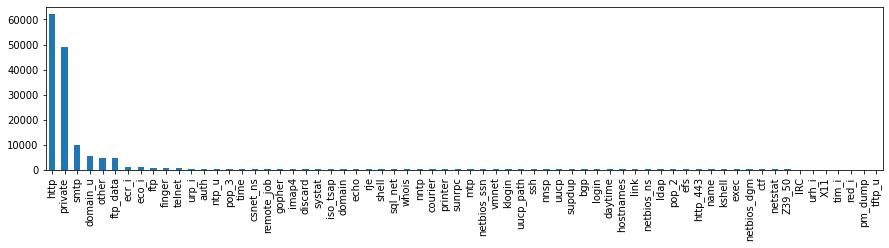

In [13]:
plt.figure(figsize=(15,3))
bar_graph('service')

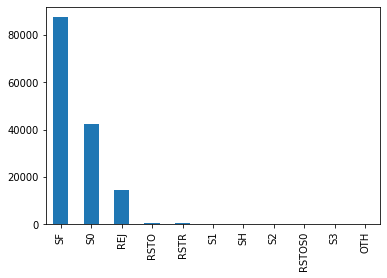

In [14]:
bar_graph('flag')

In [15]:
df.drop('service',axis = 1,inplace= True)

### OneHotencoding
df_oh = pd.get_dummies(df)
display(df_oh)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
73030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
465338,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
105559,0,301,897,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
368589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
452914,14,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2829,0,321,22780,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
141581,0,28,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11862,0,658,284,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


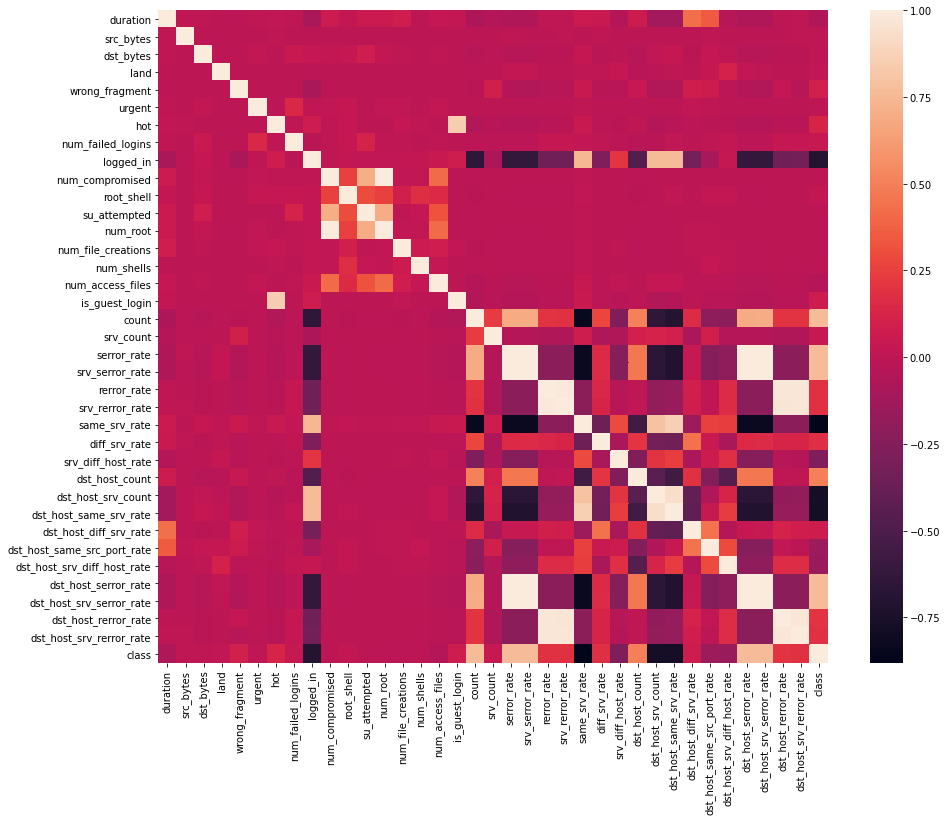

In [16]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [17]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df_oh.values)

# tsne = TSNE(random_state=17)
# tsne_repr = tsne.fit_transform(X_scaled)

# plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df_oh['class'].map({0: 'blue', 1: 'orange',2:'red',3:'green',4:'yellow'}), alpha=.5);

In [18]:
y=df['class'].values
#print(y)
df_oh.drop('class',axis = 1,inplace=True)
X = df_oh.values 
#print(X)

In [19]:
selector = RFE(DecisionTreeClassifier(), 30, step=1)
selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)

/home/harry/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


[ True  True  True False  True False  True  True  True  True  True False
  True False False False False False  True  True False False  True False
 False  True  True False  True  True  True  True  True  True  True  True
  True  True  True False False  True False False False  True  True False
 False False False  True]
[ 1  1  1  5  1 12  1  1  1  1  1 21  1  3  7 14 22 23  1  1  4 10  1  2
 15  1  1 17  1  1  1  1  1  1  1  1  1  1  1 13  9  1 18 11  6  1  1 19
  8 20 16  1]


In [20]:
df_oh.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp',
       'protocol_type_udp', 'flag_OTH', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0',
       'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF',
       'flag_SH'],
      d

In [21]:
full_X= df_oh.values

In [22]:
df_oh.drop('land',axis = 1,inplace= True)
df_oh.drop('urgent',axis = 1,inplace= True)
df_oh.drop('num_compromised',axis = 1,inplace= True)
df_oh.drop('su_attempted',axis = 1,inplace= True)
df_oh.drop('num_file_creations',axis = 1,inplace= True)
df_oh.drop('num_shells',axis = 1,inplace= True)
df_oh.drop('num_access_files',axis = 1,inplace= True)
df_oh.drop('num_outbound_cmds',axis = 1,inplace= True)
df_oh.drop('is_host_login',axis = 1,inplace= True)
df_oh.drop('serror_rate',axis = 1,inplace= True)
df_oh.drop('srv_serror_rate',axis = 1,inplace= True)
df_oh.drop('srv_rerror_rate',axis = 1,inplace= True)
df_oh.drop('srv_diff_host_rate',axis = 1,inplace= True)
df_oh.drop('protocol_type_icmp',axis = 1,inplace= True)
df_oh.drop('protocol_type_udp',axis = 1,inplace= True)
df_oh.drop('flag_OTH',axis = 1,inplace= True)
df_oh.drop('flag_REJ',axis = 1,inplace= True)
df_oh.drop('flag_RSTO',axis = 1,inplace= True)
df_oh.drop('flag_RSTOS0',axis = 1,inplace= True)
df_oh.drop('flag_S1',axis = 1,inplace= True)
df_oh.drop('flag_S2',axis = 1,inplace= True)
df_oh.drop('flag_S3',axis = 1,inplace= True)
df_oh.drop('flag_SF',axis = 1,inplace= True)


In [23]:
X = df_oh.values
print(X)
print(y)

[[  0.   0.   0. ...   0.   1.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0. 301. 897. ...   0.   0.   0.]
 ...
 [  0.  28.   0. ...   0.   0.   0.]
 [  0. 658. 284. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   1.   0.]]
[2 2 0 ... 2 0 2]


In [24]:
sc = MinMaxScaler()
X = sc.fit_transform(X)
##Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(97541, 29) (48043, 29)
(97541,) (48043,)


In [25]:
# validation with k=5
D_tree1 = DecisionTreeClassifier(max_depth=10)
D_tree2 = DecisionTreeClassifier(max_depth=20)
F_1 = RandomForestClassifier(max_depth=10)
F_2 = RandomForestClassifier(max_depth=20)
scores = cross_val_score(F_2,X_train,Y_train,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.99897483 0.99902604 0.99835965 0.99887226 0.99861595]
0.9987697460033613


In [26]:
###Cross validation with GridSearch

# rs=1

# parameters = {
#     'max_depth' :[5, 10, 15, 20 ,30, 50, 80, 100, 120, 150],
#     'criterion' :['gini', 'entropy'],
# }
# R_clf = GridSearchCV(RandomForestClassifier(random_state=rs), parameters, cv=5,verbose=2, n_jobs=-1)
# R_clf.fit(X_train, Y_train)
# print(R_clf.score(X_train, Y_train))
# print(R_clf.best_params_)

In [27]:
# parameters = {
#     'max_depth' :[5, 10, 15, 20 ,30, 50, 80, 100, 120, 150],
#     'criterion' :['gini', 'entropy'],
# }
# D_clf = GridSearchCV(DecisionTreeClassifier(random_state=rs), parameters, cv=5,verbose=2, n_jobs=-1)
# D_clf.fit(X_train, Y_train)
# print(D_clf.score(X_train, Y_train))
# print(D_clf.best_params_)

In [28]:
# parameters = {
#     'weights' : ['uniform','distance'],
#     'algorithm' : ['auto','ball_tree','kd_tree','brute'],
#     'leaf_size' : list(range(1,4)),
# }
# KNN_clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=5,verbose=2, n_jobs=-1)
# KNN_clf.fit(X_train, Y_train)
# print(KNN_clf.score(X_train, Y_train))
# print(KNN_clf.best_params_)

In [29]:
# parameters = {
#     'kernel' :['poly', 'rbf', 'sigmoid'],
#     'C': [0.1,1, 10, 100],
#     'gamma': [1,0.1],
# }
# SVC_clf = GridSearchCV(SVC(random_state=rs), parameters, cv=5, n_jobs=-1)

# SVC_clf.fit(X_train, Y_train)
# print(SVC_clf.score(X_train, Y_train))
# print(SVC_clf.best_params_)

In [30]:
classifier1 = RandomForestClassifier(criterion = "entropy", max_depth=20)
classifier2 = DecisionTreeClassifier(criterion = "entropy", max_depth=15)
classifier3 = SVC(kernel="rbf",C=100,gamma=1)
classifier4 = KNeighborsClassifier(algorithm="ball_tree",leaf_size=1,weights="distance")

###### Fit on training data #####
clf1 = classifier1.fit(X_train, Y_train)
clf2 = classifier2.fit(X_train, Y_train)
clf3 = classifier3.fit(X_train, Y_train)
clf4 = classifier4.fit(X_train, Y_train)

##### prediction #####
pred1 = clf1.predict(X_test)
pred2 = clf2.predict(X_test)
pred3 = clf3.predict(X_test)
pred4 = clf4.predict(X_test)

#accuracy matrix
ac1=100*accuracy_score(Y_test,pred1)
ac2=100*accuracy_score(Y_test,pred2)
ac3=100*accuracy_score(Y_test,pred3)
ac4=100*accuracy_score(Y_test,pred4)
print("Accuracy:")
print('{0:15s}: {1:<8f}'.format('Random Forest', ac1), '%')
print("{0:15s}: {1:<8f}".format('Decision Tree', ac2), '%')
print("{0:15s}: {1:<8f}".format('SVD', ac3), '%')
print("{0:15s}: {1:<8f}".format("KNN", ac4), '%\n')

Accuracy:
Random Forest  : 99.893845 %
Decision Tree  : 99.820994 %
SVD            : 99.781446 %
KNN            : 99.802260 %



In [41]:
class_type = ['normal','Probing' , 'DOS', 'U2R','R2L']


print("Random Forest:")
print(classification_report(Y_test,pred1, target_names=class_type))

print("\nDecision Tree:")
print(classification_report(Y_test,pred2, target_names=class_type))
print("\nSVD:")
print(classification_report(Y_test,pred3, target_names=class_type))
print("\nKNN:")
print(classification_report(Y_test,pred4, target_names=class_type))

Random Forest:
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     29036
     Probing       0.99      0.97      0.98       710
         DOS       1.00      1.00      1.00     17971
         U2R       0.80      0.47      0.59        17
         R2L       0.99      0.97      0.98       309

    accuracy                           1.00     48043
   macro avg       0.96      0.88      0.91     48043
weighted avg       1.00      1.00      1.00     48043


Decision Tree:
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     29036
     Probing       0.97      0.96      0.97       710
         DOS       1.00      1.00      1.00     17971
         U2R       0.79      0.65      0.71        17
         R2L       0.98      0.96      0.97       309

    accuracy                           1.00     48043
   macro avg       0.95      0.91      0.93     48043
weighted avg       1.00      1.00      1.00   

In [34]:
#RandomForest
cm1=confusion_matrix(Y_test,pred1)
print("Random Forest Confusion Matrix:\n", cm1)

#Decision tree
cm2=confusion_matrix(Y_test,pred2)
print("Decision Tree Confusion Matrix:\n", cm2)

#SVD
cm3=confusion_matrix(Y_test,pred3)
print("SVD Confusion Matrix:\n", cm3)

#KNN
cm4=confusion_matrix(Y_test,pred4)
print("KNN Confusion Matrix:\n", cm4)

Random Forest Confusion Matrix:
 [[29026     5     2     1     2]
 [   18   692     0     0     0]
 [    5     0 17966     0     0]
 [    9     0     0     8     0]
 [    8     0     0     1   300]]
Decision Tree Confusion Matrix:
 [[29005    18     7     3     3]
 [   22   683     5     0     0]
 [   10     1 17960     0     0]
 [    4     0     0    11     2]
 [    7     3     1     0   298]]
SVD Confusion Matrix:
 [[28989    10    13     1    23]
 [   21   686     3     0     0]
 [    3     1 17965     0     2]
 [    6     0     0     9     2]
 [   19     0     0     1   289]]
KNN Confusion Matrix:
 [[28993     6    11     4    22]
 [   17   693     0     0     0]
 [   14     1 17956     0     0]
 [    8     0     0     9     0]
 [   11     0     0     1   297]]
